## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(20)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# The shape of dataset 
data.shape

In [ ]:
# check the info of data
data.info()

In [ ]:
# check the description of student_score data
data.describe()

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

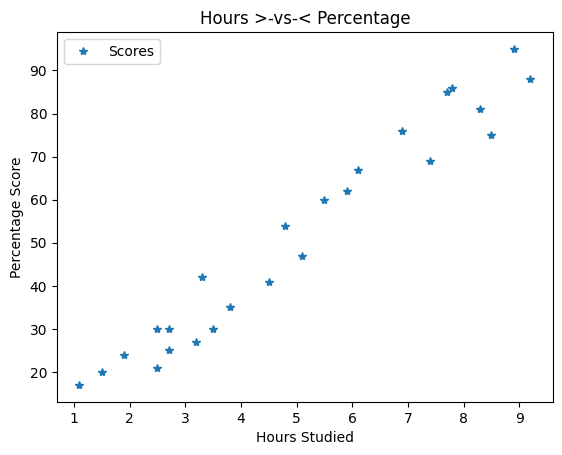

In [ ]:
dataset.plot(x='Hours', y='Scores', style='tito')  
plt.title('Hours ///and///Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.2, random_state=50) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
rv = LinearRegression().fit(X_train, y_train) 

print("Training complete.")

Training complete.


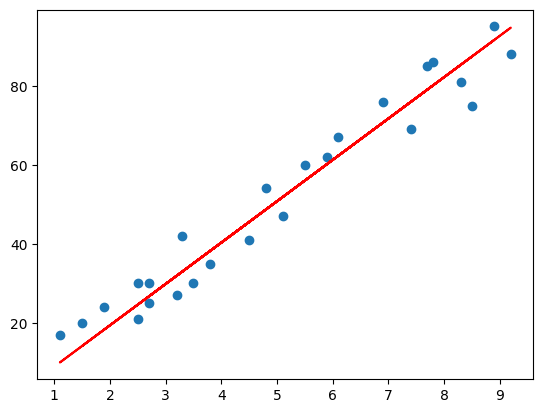

In [ ]:
line = rv.coef_*X+rv.intercept_   # Plotting the regression line

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='black')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test)   # Testing data - In Hours
y_preddiction = rv.predict(X_test)   # Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preddiction})
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [ ]:
hours = 9.25
tst = (np.array([hours])).reshape(-1, 1)

npp = rv.predict(tst)

print('Testing Hours: {}'. format(hours))
print('Accuracy Score = {}'. format(npp[0]), '%')

Testing Hours: 9.25
Accuracy Score = 95.22829438402952 %


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:

print('Absolute Mean Error =', metrics.mean_absolute_error(y_test, y_preddiction))
print("Mean Squred Error",metrics.mean_squared_error(y_test, y_preddiction))

Absolute Mean Error = 7.882398086270432
